# Sp25 PDM Intro to Data
Built and presented by Shivani Sahni and Rahil Shaik

March 19th 2025

### Section 1: Introduction to Jupyter Notebooks

#### 1.1: Introduction to Jupyter Notebooks:
Jupyter Notebooks are interactive documents that combine code, text, and visualizations, making them ideal for data analysis and teaching.​ These are commonplace in research, machine learning, and quantitative finance settings to perform exploratory data work. It enables us to run different experiments to see how we can improve a model's performance in a streamlined and convenient manner.

#### 1.2: Operating a Jupyter Notebook:

- Running Cells: Each notebook consists of cells that can contain code or text. To execute a code cell, click on it and press `Shift + Enter`. There is also a button when you hover a cell that resembles a play button that allows you to run the cell. 

- Creating Cells: You can make two types of cells in python notebooks: markdown and code. Markdowns are generally used to add explanatory text around your code cells. Code cells are used for... coding! There are options at the top taskbar to choose between markdown and code. If you double clik into this cell you can see the scripting for this markdown! 

#### 1.3: Understanding how Kernel's work
A kernel is the computational engine that executes the code in the notebook. We will select a python kernel to execute the cells in this python notebook. If the kernel stops or "dies", you can restart it with the above taskbar using 'Kernel' > 'Restart'.


### Section 2: Python and Pandas Basics

#### 2.1: Setting up your Python environment
There are a few options here including installing Python to your local system, creating a Python virtual environment (venv, conda). Today we will create a python venv virtual environment because they are genearlly lightweight and a major advantage being that you can create isolated environments that use different versions of libraries or Python itself.

If you are using macOS, you need to install Homebrew, which helps manage packages easily (I think you guys all have macOS). Access your terminal and run the below commands:

`/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"`

`echo 'eval "$(/opt/homebrew/bin/brew shellenv)"' >> ~/.zprofile`

`eval "$(/opt/homebrew/bin/brew shellenv)" `

To ensure you have installed brew, run this command

`brew --version`

Then install python

`brew install python`

And check if it is installed with

`python3 --version`

`pip --version`

Pip is a package manger, if any point you get `ModuleNotFoundError`, you can use pip to install those packages. I have listed the package requirements for this project in the 'requirements.txt' file, we can use pip to install them. 

`pip3 install -r requirements.txt`

Now we can create a python virtual environment for this project using the below commands

`python -m venv pdmdata` or `python3 -m venv pdmdata`

`source pdmdata/bin/activate`



In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import seaborn as sns

import util

In [316]:
df = pd.read_csv('voyager-meme-data-noisy.csv')

In [317]:
df.query('Member_Name == "Shivani"')

,Member_Name,Age,Time_Spent_Reddit,GIF_Collection_Size,Pun_Creation_Frequency,Twitter_Roast_Score,Caffeine_Consumption,Favorite_Meme_Format,Meme_Creativity_Score,Meme_Cluster
58,Shivani,18,20.417479,127,21.824138,3.161457,0,Two Buttons,72.695334,1
74,Shivani,16,-3.195540,221,13.738873,12.402844,7,Drake,47.281851,0
113,Shivani,21,13.326934,116,13.663476,6.716680,2,Drake,43.590798,0
336,Shivani,14,-7.317382,407,15.565771,3.735964,3,Expanding Brain,37.121580,2
369,Shivani,16,17.428779,311,-3.225691,5.441542,8,Drake,1.000000,0
465,Shivani,22,26.954010,169,1.610821,-0.400352,3,Two Buttons,18.757865,3
475,Shivani,21,26.540715,323,6.227381,-0.707782,4,Two Buttons,36.676612,3
507,Shivani,14,3.423241,255,15.002396,8.921186,1,Expanding Brain,42.217626,2
562,Shivani,18,21.678271,198,13.143829,8.506832,0,Expanding Brain,42.195341,3
574,Shivani,18,9.362749,100,13.178649,7.810770,8,Drake,41.358483,2


In [318]:
features = ["Age", "Time_Spent_Reddit", "GIF_Collection_Size", "Pun_Creation_Frequency", "Twitter_Roast_Score", "Caffeine_Consumption"]

In [319]:
r2, mae, rmse = util.run_linear_regression(df, features)

In [320]:
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.7561
Mean Absolute Error (MAE): 7.95
Root Mean Squared Error (RMSE): 101.56


### Feature Engineering

##### First let's try making an enhanced twitter roast score which is multiplied by pun creation frequency and an enhanced meme addiction score based on time spent on reddit and gif collection size 

In [321]:
df["Meme_Addiction_Score"] = df["Time_Spent_Reddit"] * df["GIF_Collection_Size"]
df["Roast_Potential"] = df["Twitter_Roast_Score"] * df["Pun_Creation_Frequency"]

df["Twitter_Roast_Score_Enhanced"] = df["Twitter_Roast_Score"] * (df["Pun_Creation_Frequency"])
df["Meme_Addiction_Score_Enhanced"] = df["Time_Spent_Reddit"] * (df["GIF_Collection_Size"])

features = ["Age", "Time_Spent_Reddit", "GIF_Collection_Size", "Pun_Creation_Frequency", 
            "Caffeine_Consumption", "Roast_Potential", "Twitter_Roast_Score", "Meme_Addiction_Score",
            "Twitter_Roast_Score_Enhanced", "Meme_Addiction_Score_Enhanced"]

In [322]:
df["Twitter_Roast_Score_Enhanced"]

0      112.762790
1      -16.685989
2       65.220348
3       -8.991596
4       10.084938
          ...    
995     31.261742
996     33.040917
997      6.767489
998     60.754997
999     45.532716
Name: Twitter_Roast_Score_Enhanced, Length: 1000, dtype: float64

In [323]:
r2, mae, rmse = util.run_linear_regression(df, features)

In [324]:
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.7538
Mean Absolute Error (MAE): 8.04
Root Mean Squared Error (RMSE): 102.54


##### This reduces r-squared so let's try a new feature altogether using some clustering to create a new feature

In [325]:
## try at some point

### Trying Decision Trees

In [326]:
df

,Member_Name,Age,Time_Spent_Reddit,GIF_Collection_Size,Pun_Creation_Frequency,Twitter_Roast_Score,Caffeine_Consumption,Favorite_Meme_Format,Meme_Creativity_Score,Meme_Cluster,Meme_Addiction_Score,Roast_Potential,Twitter_Roast_Score_Enhanced,Meme_Addiction_Score_Enhanced
0,Rohan,17,11.696172,429,25.587059,4.407024,1,Doge,51.305392,1,5017.657852,112.762790,112.762790,5017.657852
1,Christine,14,18.637143,141,-1.500273,11.121966,2,Drake,13.566707,3,2627.837097,-16.685989,-16.685989,2627.837097
2,Peter,15,4.519813,406,11.252994,5.795822,8,Drake,43.393675,2,1835.044214,65.220348,65.220348,1835.044214
3,Kijun,19,15.832905,413,-3.135085,2.868055,3,Doge,5.513980,3,6538.989746,-8.991596,-8.991596,6538.989746
4,Nicole,21,14.218916,423,0.921907,10.939215,8,Two Buttons,22.705517,0,6014.601367,10.084938,10.084938,6014.601367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Shashaank,19,10.257413,78,11.333088,2.758449,7,Expanding Brain,40.661018,2,800.078190,31.261742,31.261742,800.078190
996,Ryu,21,1.650566,160,7.855848,4.205901,7,Surprised Pikachu,21.354484,0,264.090481,33.040917,33.040917,264.090481
997,Garrett,15,31.178208,182,2.294633,2.949268,2,Doge,15.796300,1,5674.433890,6.767489,6.767489,5674.433890
998,Aakash,22,13.176606,13,11.474159,5.294941,8,Surprised Pikachu,21.600764,1,171.295884,60.754997,60.754997,171.295884


##### Trying one more feature: Meme Obsession Score

In [327]:
df["Meme_Obsession_Score"] = (df["Pun_Creation_Frequency"] + df["Twitter_Roast_Score"]) * (
    df["Time_Spent_Reddit"] + df["GIF_Collection_Size"]
)

df["Meme_Efficiency_Score"] = (df["Pun_Creation_Frequency"] + df["Twitter_Roast_Score"]) * (
    df["Time_Spent_Reddit"] + df["GIF_Collection_Size"]
)

features = ["Age", "Time_Spent_Reddit", "GIF_Collection_Size", "Pun_Creation_Frequency", 
            "Caffeine_Consumption", "Roast_Potential", "Twitter_Roast_Score", "Meme_Addiction_Score",
            "Twitter_Roast_Score_Enhanced", "Meme_Addiction_Score_Enhanced", "Meme_Obsession_Score",
              "Meme_Efficiency_Score"]

In [328]:
r2, mae, mse = util.run_random_forest(df, features)
print(r2)

0.7247527552814796


##### Let's build an optimizer for this to see which combination of features maximizes r-squared

In [329]:
df = df.dropna()
y = df["Meme_Creativity_Score"]

X_train_full, X_test_full, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)
best_r2 = -float("inf")
selected_features = []

for i in range(1, len(features) + 1):
    best_temp_r2 = -float("inf")
    best_temp_feature = None

    for feature in features:
        if feature in selected_features:
            continue

        temp_features = selected_features + [feature]
        model = LinearRegression()
        model.fit(X_train_full[temp_features], y_train)
        y_pred = model.predict(X_test_full[temp_features])
        r2 = r2_score(y_test, y_pred)

        if r2 > best_temp_r2:
            best_temp_r2 = r2
            best_temp_feature = feature

    if best_temp_feature:
        selected_features.append(best_temp_feature)
        best_r2 = best_temp_r2

In [330]:
best_r2, selected_features

(0.7541303376332703,
 ['Pun_Creation_Frequency',
  'Time_Spent_Reddit',
  'Twitter_Roast_Score',
  'Caffeine_Consumption',
  'Meme_Obsession_Score',
  'Meme_Efficiency_Score',
  'Age',
  'Meme_Addiction_Score',
  'Meme_Addiction_Score_Enhanced',
  'GIF_Collection_Size',
  'Roast_Potential',
  'Twitter_Roast_Score_Enhanced'])

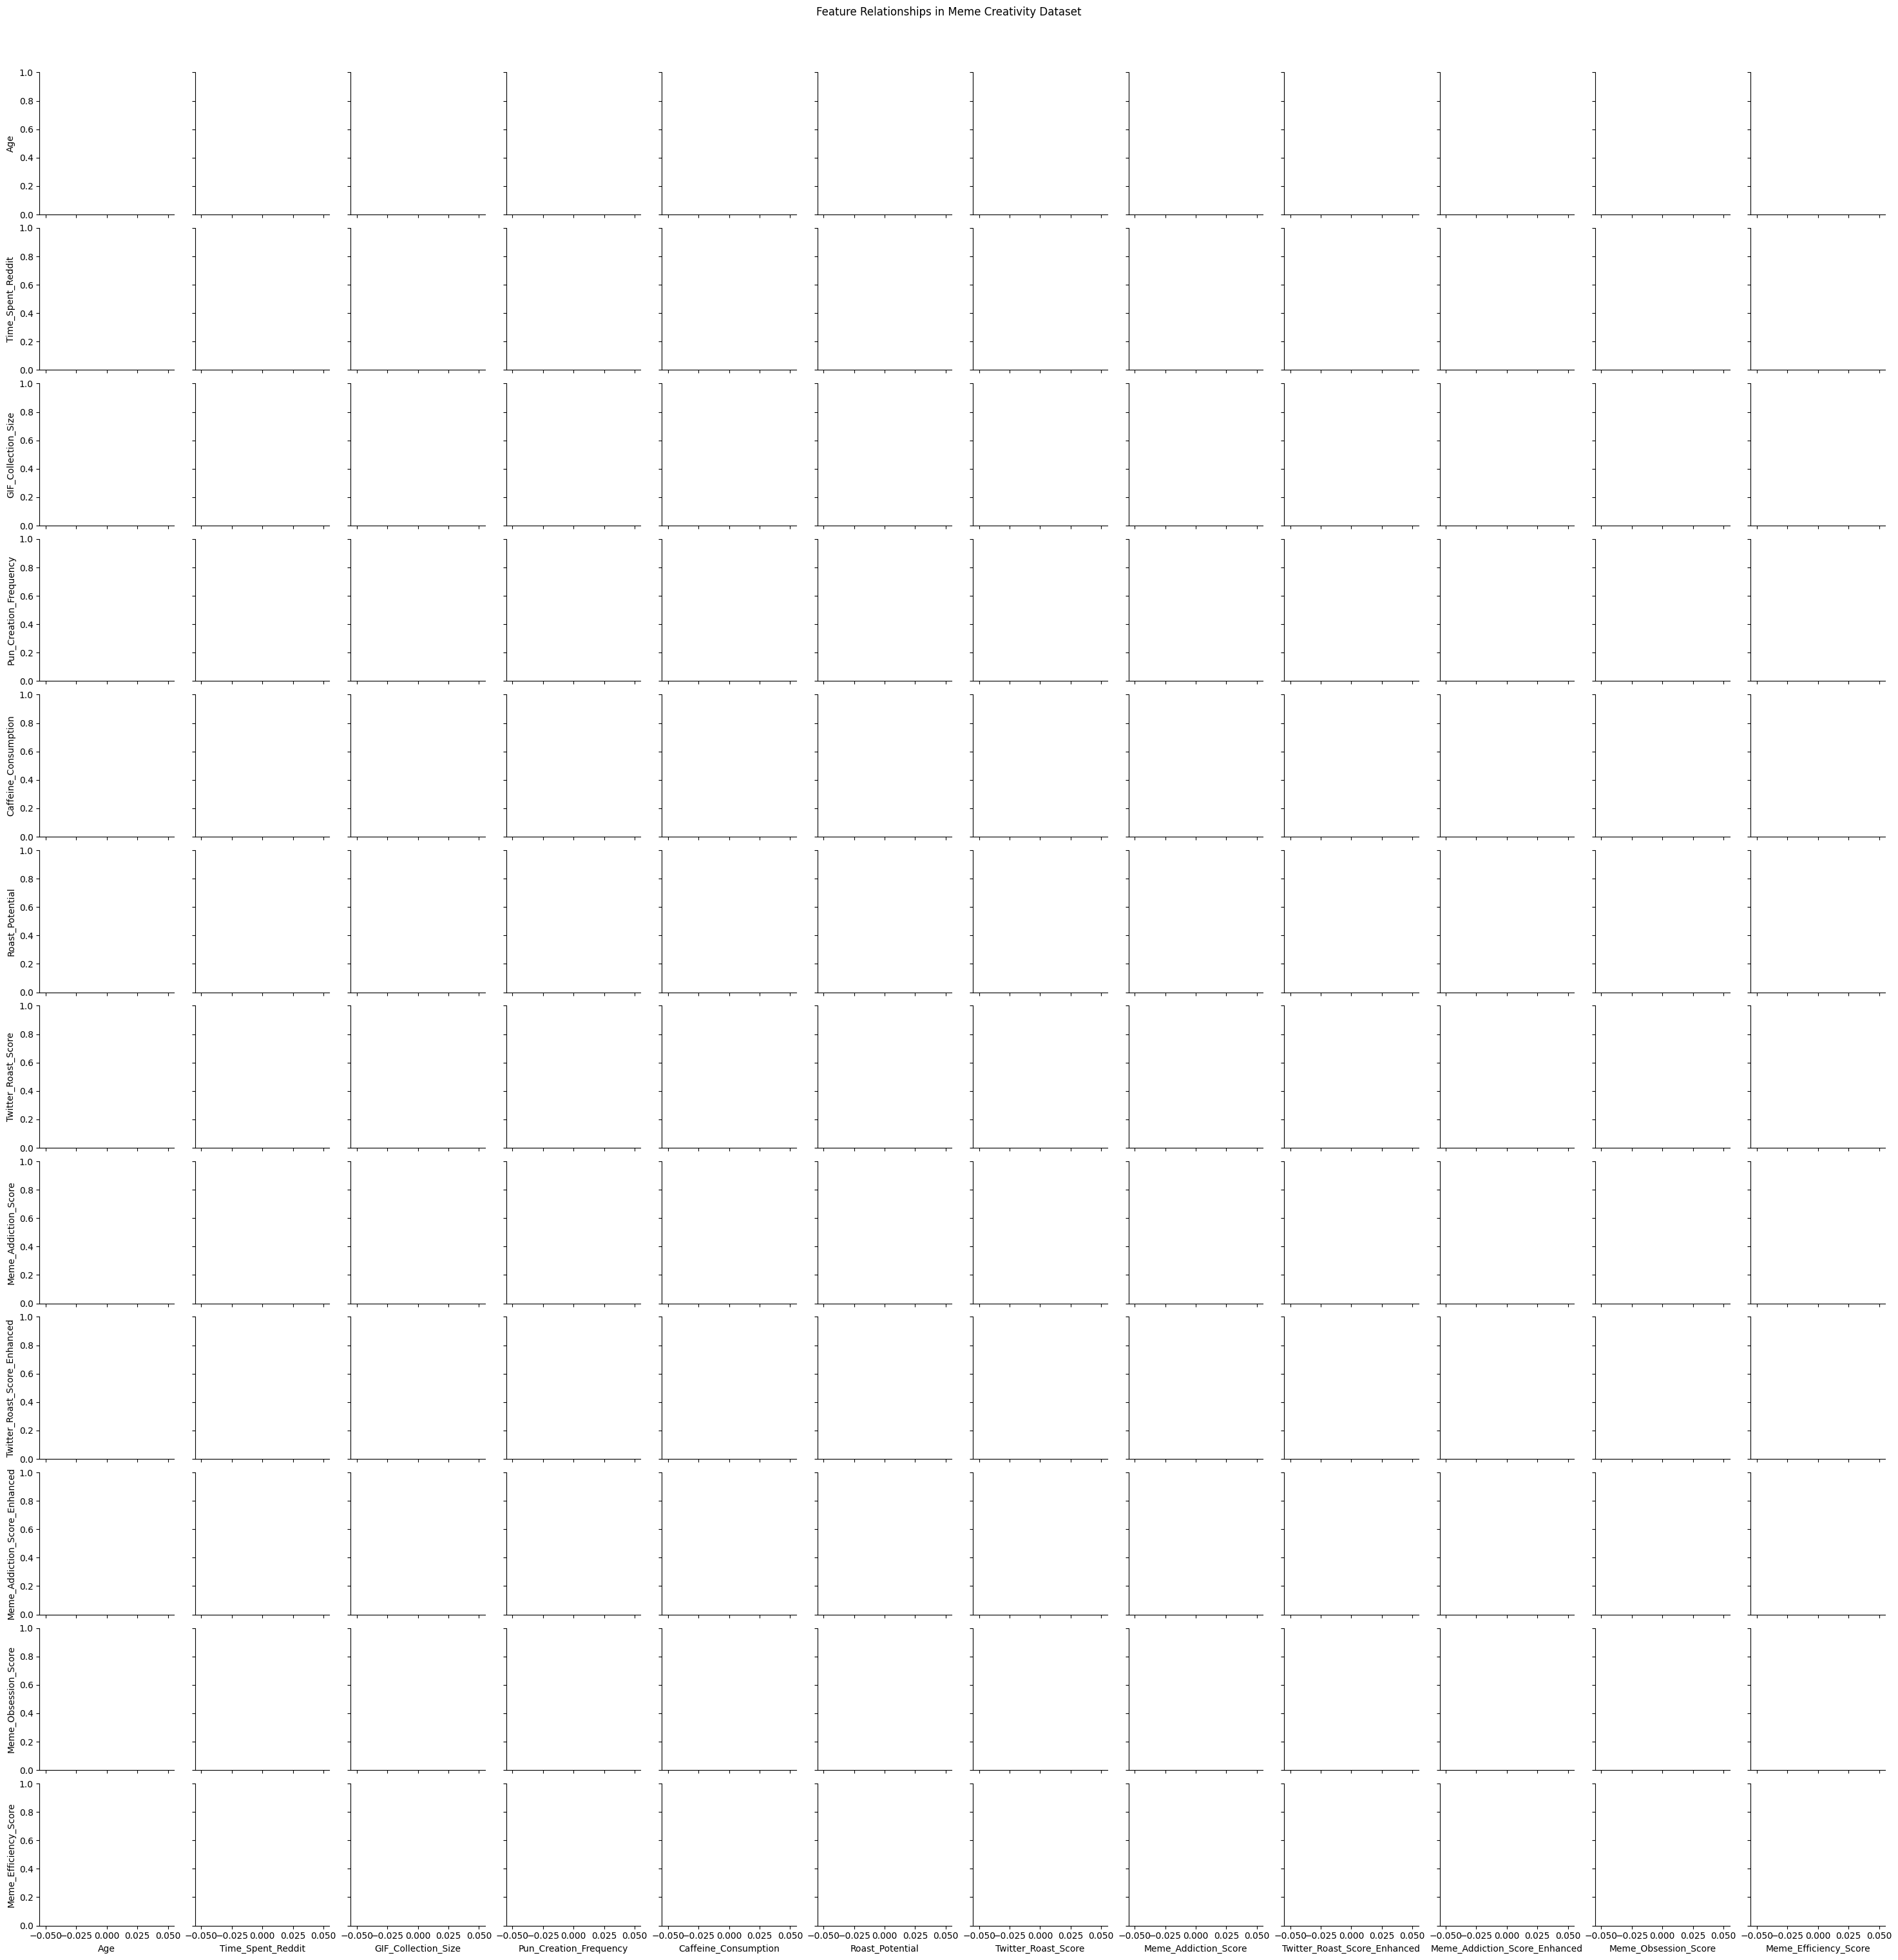

In [332]:
df_large = df.apply(pd.to_numeric, errors='coerce')
df_large.replace([np.inf, -np.inf], np.nan, inplace=True)
df_large.dropna(inplace=True)

sns.pairplot(df_large[features], diag_kind="kde")
plt.suptitle("Feature Relationships in Meme Creativity Dataset", y=1.02)
plt.show()
